In [1]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset,DataLoader

In [2]:
# Create class for plotting

def plot_data(data_set, model = None, n = 1, color = False):
    X = data_set[:][0]
    Y = data_set[:][1]
    #plotting only on x axis when y is 0,1,2 
    plt.plot(X[Y == 0, 0].numpy(), Y[Y == 0].numpy(), 'bo', label = 'y = 0')
    plt.plot(X[Y == 1, 0].numpy(), 0 * Y[Y == 1].numpy(), 'ro', label = 'y = 1')
    plt.plot(X[Y == 2, 0].numpy(), 0 * Y[Y == 2].numpy(), 'go', label = 'y = 2')
    plt.ylim((-0.1, 3))
    plt.legend()
    if model != None:
        w = list(model.parameters())[0][0].detach()
        b = list(model.parameters())[1][0].detach()
        y_label = ['yhat=0', 'yhat=1', 'yhat=2']
        y_color = ['b', 'r', 'g']
        Y = []
        for w, b, y_l, y_c in zip(model.state_dict()['0.weight'], model.state_dict()['0.bias'], y_label, y_color):
            Y.append((w * X + b).numpy())
            plt.plot(X.numpy(), (w * X + b).numpy(), y_c, label = y_l)
        if color == True:
            x = X.numpy()
            x = x.reshape(-1)
            top = np.ones(x.shape)
            y0 = Y[0].reshape(-1)
            y1 = Y[1].reshape(-1)
            y2 = Y[2].reshape(-1)
            plt.fill_between(x, y0, where = y1 > y1, interpolate = True, color = 'blue')
            plt.fill_between(x, y0, where = y1 > y2, interpolate = True, color = 'blue')
            plt.fill_between(x, y1, where = y1 > y0, interpolate = True, color = 'red')
            plt.fill_between(x, y1, where = ((y1 > y2) * (y1 > y0)),interpolate = True, color = 'red')
            plt.fill_between(x, y2, where = (y2 > y0) * (y0 > 0),interpolate = True, color = 'green')
            plt.fill_between(x, y2, where = (y2 > y1), interpolate = True, color = 'green')
    plt.legend()
    plt.show()

In [3]:
torch.manual_seed(0)

In [4]:
class Data(Dataset):
    def __init__(self):
        self.x  = torch.arange(-2,2,0.1).view(-1,1)
        self.y = torch.zeros(self.x.shape[0])
        #index of x where -1 < x < 1.0. Make those index on y to be equal to 1. here * acts as AND
        self.y[(self.x > -1.0)[:,0] * (self.x < 1.0)[:,0]] = 1
        self.y[(self.x >= 1.0)[:,0]] = 2
        self.y = self.y.type(torch.LongTensor)
        self.len = self.x.shape[0]
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

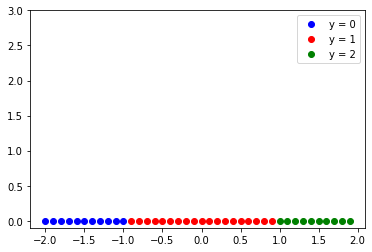

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [47]:
data_set = Data()
plot_data(data_set)
print(data_set.y)

In [66]:
#Softmax
model = nn.Sequential(nn.Linear(1,3))
model.state_dict()
dummyX = torch.tensor([[1.0],[2.0],[3.0]])
model(dummyX)

tensor([[ 0.0356, -1.5268, -0.6099],
        [-0.3622, -2.4615, -1.3632],
        [-0.7600, -3.3962, -2.1165]], grad_fn=<AddmmBackward>)

In [50]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
trainloader = DataLoader(dataset = data_set,batch_size=5)

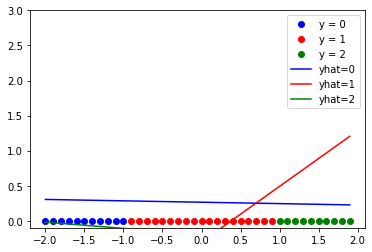

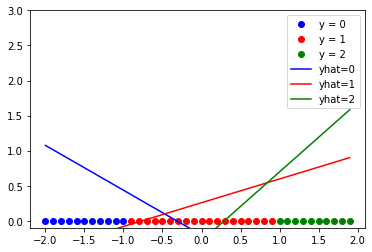

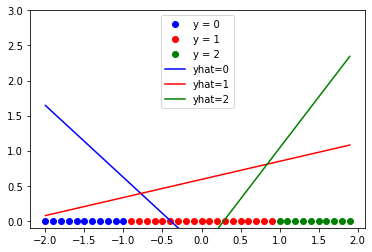

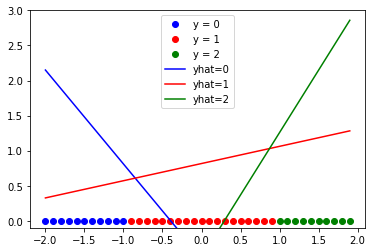

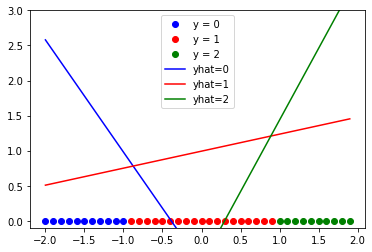

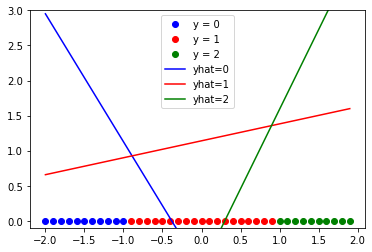

In [51]:
LOSS = []
def train_model(epochs):
    for epoch in range(epochs):
        if epoch % 50 == 0:
            pass
            plot_data(data_set,model)
        for x,y in trainloader:
            optimizer.zero_grad()
            yhat = model(x)
            #compare 3 values of yhat with y
            #whichever has the highest difference is the lowest loss (crossentropy mofo)
            loss = criterion(yhat,y)
            LOSS.append(loss)
            loss.backward()
            optimizer.step()
train_model(300)
            
            

In [52]:
#making prediction
z = model(data_set.x)
#return the max value in each output which contains 3 values
#max value in dim=1 of z. first z contains [out1,out2,out3] 
#we use max because in cross entropy max value of yhat has the lowest loss, hence we choose it.
#Also the model created the yhat and y_label
_, yhat = z.max(1)
#
print("the prediction: ",yhat)

the prediction:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [53]:
correct = (data_set.y == yhat).sum().item()
accuracy = correct/len(data_set)
print("The accuracy: ",accuracy)

The accuracy:  0.975


In [54]:
Softmax_fn = nn.Softmax(dim=-1)

In [55]:
probability = Softmax_fn(z)

In [59]:
probability[0,0]

tensor(0.9235, grad_fn=<SelectBackward>)

In [74]:
z.max(1)

torch.return_types.max(
values=tensor([3.2790, 3.0769, 2.8748, 2.6727, 2.4706, 2.2685, 2.0664, 1.8643, 1.6622,
        1.4601, 1.2580, 1.0559, 1.0758, 1.0999, 1.1240, 1.1481, 1.1721, 1.1962,
        1.2203, 1.2444, 1.2685, 1.2926, 1.3167, 1.3408, 1.3649, 1.3890, 1.4131,
        1.4371, 1.4612, 1.4853, 1.7246, 1.9710, 2.2175, 2.4639, 2.7103, 2.9568,
        3.2032, 3.4496, 3.6961, 3.9425], grad_fn=<MaxBackward0>),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))